In [ ]:
import tweepy
import time
import csv
import pandas as pd


consumer_key= 'insert'
consumer_secret= 'insert'
access_token= 'insert'
access_token_secret= 'insert'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
# update these for whatever tweet you want to process replies to
name = 'KimKardashian'
target_tweet_id = "1557003831548211201"
 
replies=[]
for tweet in tweepy.Cursor(api.search,q='to:'+name, result_type='recent', timeout=999999).items(1000):
   if hasattr(tweet, 'in_reply_to_status_id_str'):
       if (tweet.in_reply_to_status_id_str==target_tweet_id):
           replies.append(tweet)
 
# update these for whatever tweet you want to process replies to
tweet_pd = pd.DataFrame(replies)

In [ ]:
def tweetstoDataFrame(tweets):
 
   DataSet = pd.DataFrame()
 
   DataSet['tweetID'] = [tweet.id for tweet in tweets]
   DataSet['tweetText'] = [tweet.text for tweet in tweets]
   DataSet['tweetCreated'] = [tweet.created_at for tweet in tweets]
   DataSet['userScreen'] = [tweet.user.name for tweet in tweets]
   ...
   return DataSet
 
#Pass the tweets list to the above function to create a DataFrame
DataSet = tweetstoDataFrame(replies)

#Export the dataset to csv
DataSet.to_csv('tweets_kim.csv')

In [ ]:
DataSet.shape

(422, 4)

In [ ]:
DataSet.head(1)

,tweetID,tweetText,tweetCreated,userScreen
0,1557373173103984640,@KimKardashian @beatsbydre 🐫 toe,2022-08-10 14:27:53,Lalo


In [ ]:
import re

def cleaner(txt):
  txt = re.sub(r'@[A-Za-z0-9_]+', '',txt)
  txt = re.sub(r'#', '', txt)
  txt = re.sub(r'RT : ', '', txt)
  txt = re.sub(r'https?:\/\/[A-Aa-a0-9\.\/]+', '', txt)
  return txt

DataSet["clean"] = DataSet["tweetText"].map(lambda x: cleaner(x))

In [ ]:
DataSet.head(5)

,tweetID,tweetText,tweetCreated,userScreen,clean
0,1557373173103984640,@KimKardashian @beatsbydre 🐫 toe,2022-08-10 14:27:53,Lalo,🐫 toe
1,1557370410605449221,@KimKardashian @beatsbydre Help us out by lett...,2022-08-10 14:16:55,Jonathan Harrington,Help us out by letting us sell your products...
2,1557367673486512128,@KimKardashian @beatsbydre ‼️‼️‼️,2022-08-10 14:06:02,J.C.3_,‼️‼️‼️
3,1557367582809899011,@KimKardashian @beatsbydre Kim i guess you sho...,2022-08-10 14:05:40,Elizabeth enyia,Kim i guess you should stop putting on all t...
4,1557366981980049408,@KimKardashian @beatsbydre Who again,2022-08-10 14:03:17,Raphael,Who again


In [ ]:
from textblob import TextBlob

In [ ]:
def getTextSubjectivity(txt):
  return TextBlob(txt).sentiment.subjectivity

def getTextPolarity(txt):
  return TextBlob(txt).sentiment.polarity

In [ ]:
DataSet['Subjectivity']=DataSet['tweetText'].apply(getTextSubjectivity)
DataSet['Polarity']=DataSet['tweetText'].apply(getTextPolarity) #polarity<0 = -ve sentiment, =0 =neutral and >0 = +ve
DataSet.head(2)

,tweetID,tweetText,tweetCreated,userScreen,clean,Subjectivity,Polarity
0,1557373173103984640,@KimKardashian @beatsbydre 🐫 toe,2022-08-10 14:27:53,Lalo,🐫 toe,0.0,0.0
1,1557370410605449221,@KimKardashian @beatsbydre Help us out by lett...,2022-08-10 14:16:55,Jonathan Harrington,Help us out by letting us sell your products...,0.4,0.8


In [ ]:
def getTextAnalysis(a):
  if a<0:
    return "Negative"
  elif a==0:
    return "Neutral"
  else:
    return "Positive"

In [ ]:
DataSet["Score"]=DataSet['Polarity'].apply(getTextAnalysis)
DataSet.head(5)

,tweetID,tweetText,tweetCreated,userScreen,clean,Subjectivity,Polarity,Score
0,1557373173103984640,@KimKardashian @beatsbydre 🐫 toe,2022-08-10 14:27:53,Lalo,🐫 toe,0.00000,0.00000,Neutral
1,1557370410605449221,@KimKardashian @beatsbydre Help us out by lett...,2022-08-10 14:16:55,Jonathan Harrington,Help us out by letting us sell your products...,0.40000,0.80000,Positive
2,1557367673486512128,@KimKardashian @beatsbydre ‼️‼️‼️,2022-08-10 14:06:02,J.C.3_,‼️‼️‼️,0.00000,0.00000,Neutral
3,1557367582809899011,@KimKardashian @beatsbydre Kim i guess you sho...,2022-08-10 14:05:40,Elizabeth enyia,Kim i guess you should stop putting on all t...,0.64375,0.19375,Positive
4,1557366981980049408,@KimKardashian @beatsbydre Who again,2022-08-10 14:03:17,Raphael,Who again,0.00000,0.00000,Neutral


In [ ]:
positive=DataSet[DataSet['Score']=="Positive"]
print(str(positive.shape[0]/(DataSet.shape[0])*100)+"% of Positive tweets")
pos=positive.shape[0]/DataSet.shape[0]*100

35.308056872037916% of Positive tweets


In [ ]:
negative=DataSet[DataSet['Score']=="Negative"]
print(str(negative.shape[0]/(DataSet.shape[0])*100)+"% of Negative tweets")
neg=negative.shape[0]/DataSet.shape[0]*100

10.42654028436019% of Negative tweets


In [ ]:
neutral=DataSet[DataSet['Score']=="Neutral"]
print(str(neutral.shape[0]/(DataSet.shape[0])*100)+"% of Neutral tweets")
neu=neutral.shape[0]/DataSet.shape[0]*100

54.2654028436019% of Neutral tweets


In [ ]:
import matplotlib.pyplot as plt

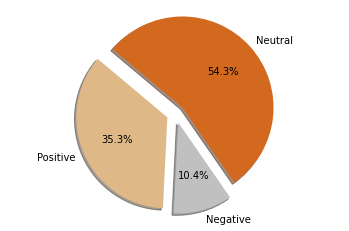

In [ ]:
labels = 'Positive', 'Negative', 'Neutral'
sizes = [35.3, 10.4, 54.2]
colors = ['burlywood', 'silver', 'chocolate']
explode = (0.1, 0.1, 0.1)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()

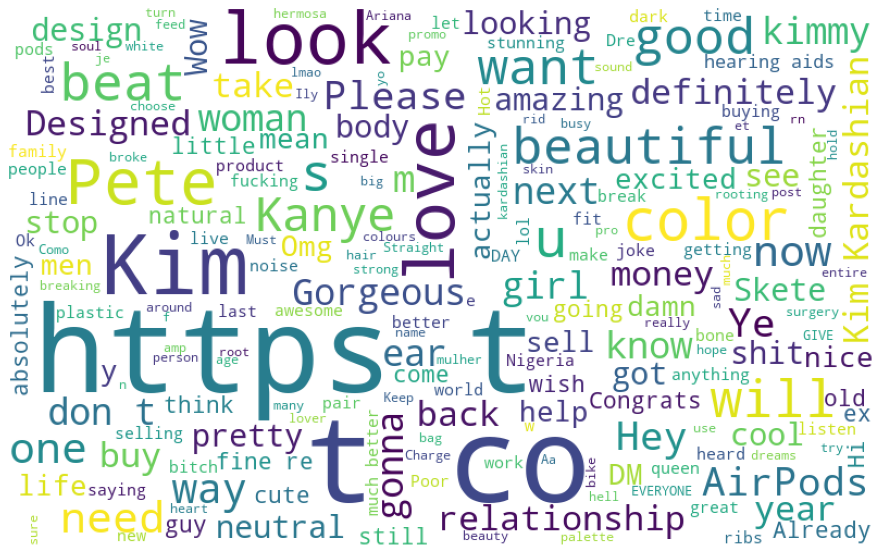

In [ ]:
all_words = ' '.join([text for text in DataSet['clean']])
from wordcloud import WordCloud
wordcloud = WordCloud(background_color = 'white', width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
from wordcloud import STOPWORDS

print(type(STOPWORDS))

stop_words = STOPWORDS.update(["https", "co", "RT", "t", "s"])


<class 'set'>


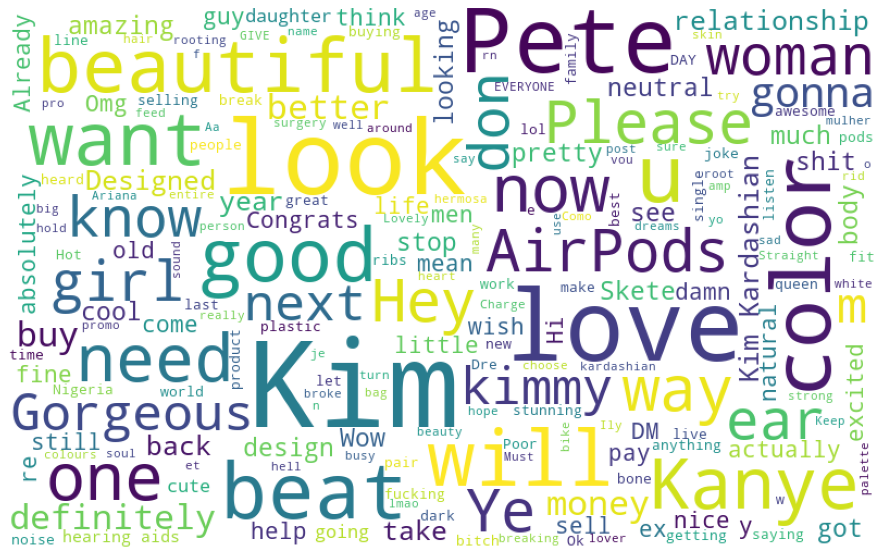

In [ ]:
all_words = ' '.join([text for text in DataSet['clean']])
wordcloud = WordCloud(stopwords = stop_words, background_color="white", width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure( figsize=(16,10) )
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
